In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

./data\gender_submission.csv
./data\test.csv
./data\train.csv


<h3>Data Extraction</h3>

In [3]:
#Data Extraction
train_data = pd.read_csv("./data/train.csv")

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.shape

(891, 12)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<h3>Data Cleaning</h3>

<AxesSubplot:>

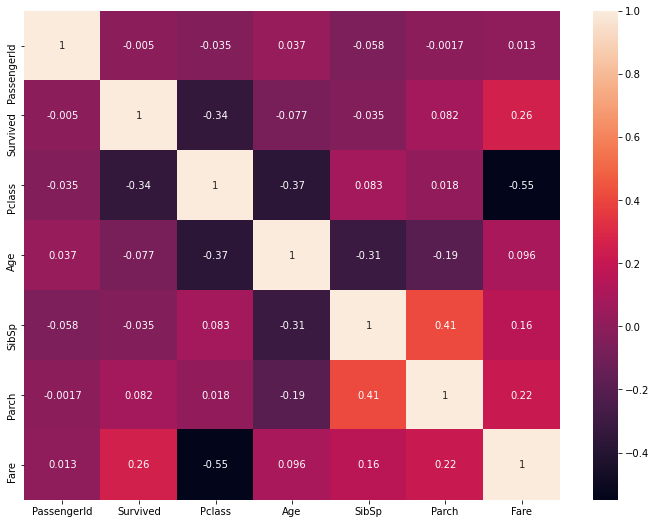

In [7]:
# looking at the correlation of numerical values and identifying data that is not needed
plt.subplots(figsize=(12, 9))
sns.heatmap(train_data.corr(),annot=True)

In [8]:
# we can see that passengerId has almost zero correlation to the passenger surviving
# and to us that makes sense

# we can also see a low correlation between survival and Age, SibSp, and Parch
# which we think should influence the result. so we will not remove them.

del train_data["PassengerId"]

In [9]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<H3>Data Wrangling</H3>
<br>Lets Explore more about the ages of the passenger
<br>This is a continuous numerical field
<br>we can also see that it has some missing values
<br>and so, we will try to fill them


In [10]:
age_list = train_data["Age"]
age_list.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [11]:
train_data["Age"].fillna(train_data["Age"].mean(), inplace=True)
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [8]:
age_list.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
age_list.mean()

29.69911764705882

In [10]:
age_list.median()

28.0

<H3>Data Analysis</H3>

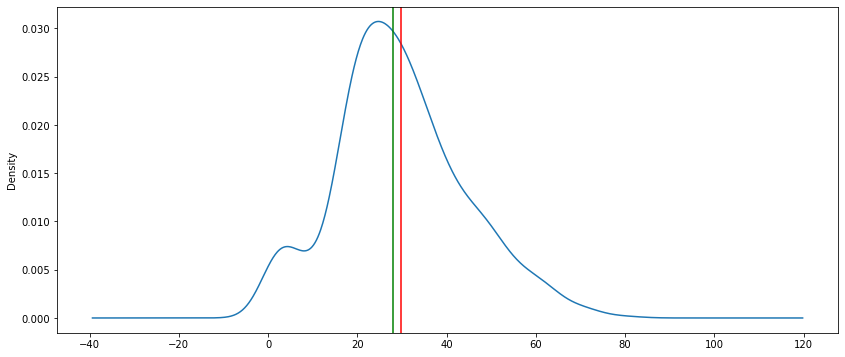

In [11]:
gr = age_list.plot(kind='density', figsize=(14,6))
gr.axvline(age_list.mean(), color='red')
gr.axvline(age_list.median(), color='green')
# Here we are calling plot via pandas, but this is ultimately being performed by Matplotlib

In [12]:
def plot_density(column):
    gr = column.plot(kind='density', figsize=(14,6))
    gr.axvline(column.mean(), color='red')
    gr.axvline(column.median(), color='green')
    gr.set_xlim(column.min(),column.max())

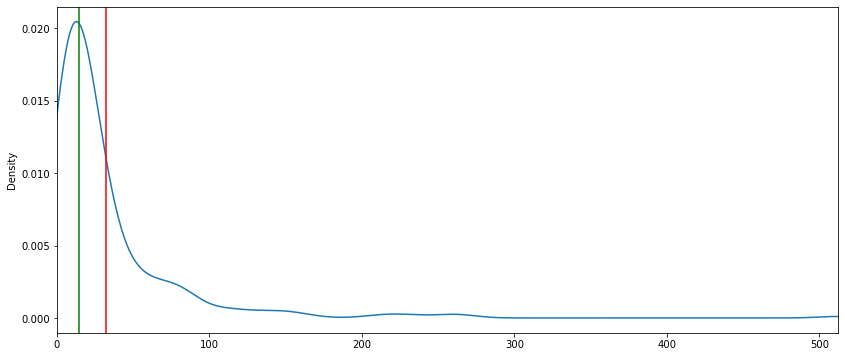

In [13]:
plot_density(train_data["Fare"])

<AxesSubplot:>

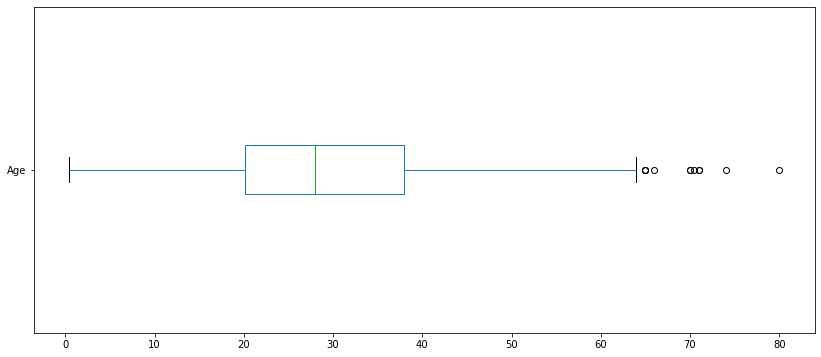

In [14]:
age_list.plot(kind='box', vert=False, figsize=(14,6))

<AxesSubplot:>

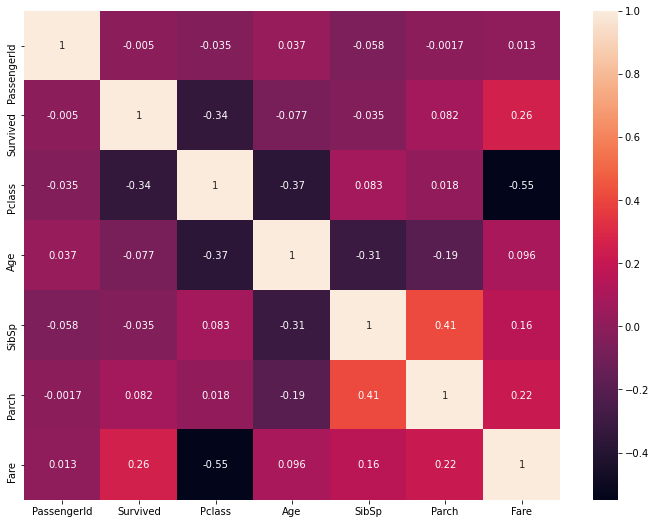

In [15]:
plt.subplots(figsize=(12, 9))
sns.heatmap(train_data.corr(),annot=True)

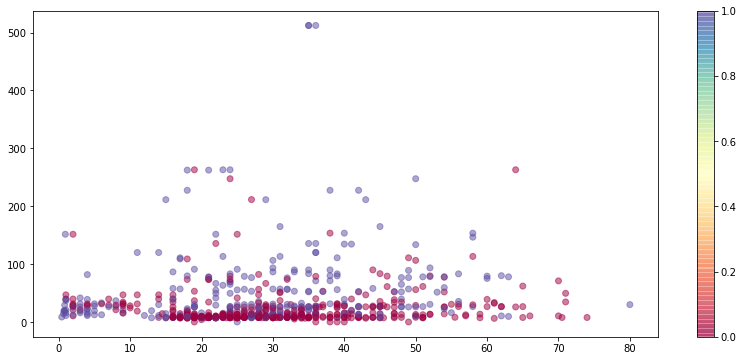

In [18]:
plt.figure(figsize=(14,6))

survive_color = train_data.Survived

plt.scatter(train_data.Age,train_data.Fare, c = train_data.Survived, alpha = 0.5, cmap = "Spectral")

plt.colorbar()

plt.show()

plt.

# survive_color.head()

<H3>Lets quickly try to get a prediction model using Sklearn</H3>

In [21]:
from sklearn.ensemble import RandomForestClassifier

test_data = pd.read_csv("./data/test.csv")

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})

output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
